## Анализ интернет-магазина "Стримчик"

### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


### Описание данных

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Шаг 1. Загрузка данных

Импортируем нужные библиотеки и загрузим датафрейм

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st

plt.rcParams.update({'figure.max_open_warning': 0})

pd.options.display.max_columns = 20

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Рассмотрим первые 20 значений датафрейма

In [5]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


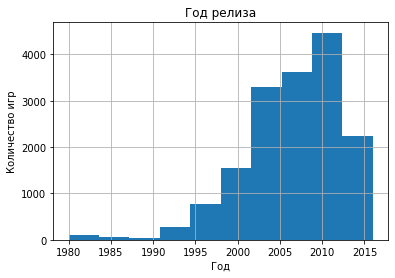

<Figure size 720x720 with 0 Axes>

In [6]:
plt.hist(data['Year_of_Release'], bins = 10)
plt.title('Год релиза')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.grid()
plt.figure(figsize=(10,10))
plt.show()

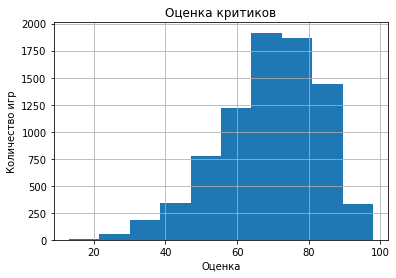

<Figure size 720x720 with 0 Axes>

In [7]:
plt.hist(data['Critic_Score'], bins = 10)
plt.title('Оценка критиков')
plt.xlabel('Оценка')
plt.ylabel('Количество игр')
plt.grid()
plt.figure(figsize=(10,10))
plt.show()

In [8]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [9]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [10]:
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [11]:
data['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [12]:
data['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

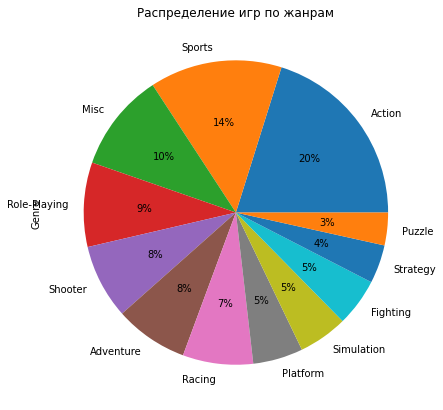

In [13]:
data['Genre'].value_counts().plot(
    kind = 'pie', 
    autopct = '%1.0f%%',
    figsize=(7,7), 
    title = 'Распределение игр по жанрам');

**Вывод**

Загрузили и рассмотрели данные.

- Количество выпускаемых игр начало резко расти, начиная с 95 года
- Чаще всего критики выдают играм оценку от 60 до 90 баллов
- Чаще всего выпускают игры в жанре `Action`, реже всего в жанре `Puzzle`
- Рассматривая первые 20 строк датафрейма, заметили пропуски в столбцах `Critic_Score`, `User_Score`, `Rating`. Причина пропусков пока что не ясна.

## Шаг 2. Предобработка данных

**Приведем все названия столбцов к нижнему регистру для удобства.**

In [14]:
data.columns = data.columns.str.lower()

In [15]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Рассмотрим пропуски в столбцах**

In [16]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Вычислим процентное соотношение пропусков в датафрейме.

In [17]:
pass_year = data.year_of_release.isna().sum() / len(data)

In [18]:
pass_critic_score = data.critic_score.isna().sum() / len(data) 

In [19]:
pass_user_score = data.user_score.isna().sum() / len(data)

In [20]:
pass_rating =  data.rating.isna().sum() / len(data)

In [21]:
print(f"""Процентное соотношение пропущенных значений: 
\nГод выпуска: {pass_year:.1%}
\nОценка критиков: {pass_critic_score:.1%}
\nОценка пользователей: {pass_user_score:.1%}
\nРейтинг: {pass_rating:.1%}""")

Процентное соотношение пропущенных значений: 

Год выпуска: 1.6%

Оценка критиков: 51.3%

Оценка пользователей: 40.1%

Рейтинг: 40.5%


**Столбец `name`**

In [22]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Можем смело удалять, т.к. данные строки не повлияют на итоговый результат

In [23]:
data = data.dropna(subset = ['name'])

In [24]:
data['name'].isna().sum()

0

In [25]:
data = data.reset_index(drop = True)

In [26]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Столбец `year_of_release`**

Сначала приведем к целочисленному типу, для удобства просмотра.

In [27]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [28]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Можно предположить, что одна и та же игра выпускалась на разных платформах, и там будет указание года выхода. Но отбросим эту версию, т.к. пропуски не повлияют на конечный результат + производители часто разрабатывают игры под одну платформу, а спустя несколько лет импортируют на другую.

**Столбец `user_score`**

In [29]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Заметили значение `tbd`. Это аббревиатура, которая расшифровывается как "To be determined" или "Предстоит определить".

То есть по факту значения нет, поэтому можно заменить `tbd` на `NaN`

In [30]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [31]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Теперь можем заменить тип данных столбца на float

In [32]:
data['user_score'] = data['user_score'].astype('float')

In [33]:
data.user_score.dtypes

dtype('float64')

**Посчитаем суммарные продажи по всем регионам и добавим информацию в новый столбец `overall_sales`**

In [34]:
data['overall_sales'] = data.na_sales + data.eu_sales + data.jp_sales + data.other_sales

In [35]:
data.overall_sales.head(10)

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
5    30.26
6    29.80
7    28.91
8    28.32
9    28.31
Name: overall_sales, dtype: float64

**Вывод**

Привели названия столбцов к нижнему регистру.

Рассмотрели количество пропусков в столбцах от общего количества данных:
- Год выпуска: 1.6%
- Оценка критиков: 51.3%
- Оценка пользователей: 54.6%
- Рейтинг: 40.5%

В оценках критиков и пользователей пропущено более 50% значений. В рейтинге около 40%. 

Пропуски в оценках возможно вызваны тем, что игры только анонсировали, либо же игры были выпущены достаточно давно и их попросту не оценивают. Про рейтинг предположу, что ESRB(Entertainment Software Rating Board) была основана не так давно, и поэтому не всем играм успели присвоить рейтинг.

- `year_of_relise` привели к целочисленному типу, для удобства просмотра.
- В столбце `user_score` заменили значение 'tbd' на 'nan', также изменили тип данных на float.
- Добавили доаолнительный столбец `overall_sales` с данными о суммарных продажах игр.

## Шаг 3. Исследовательский анализ данных

**Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

In [36]:
data.year_of_release.min()

1980

In [37]:
data.year_of_release.max()

2016

In [38]:
games_by_year = data.pivot_table(index = 'year_of_release', 
                                      values = 'name', 
                                      aggfunc = 'count')

In [39]:
games_by_year.sample(8)

,name
year_of_release,
1988,15
1984,14
1996,263
1998,379
1983,17
1982,36
2014,581
2008,1427


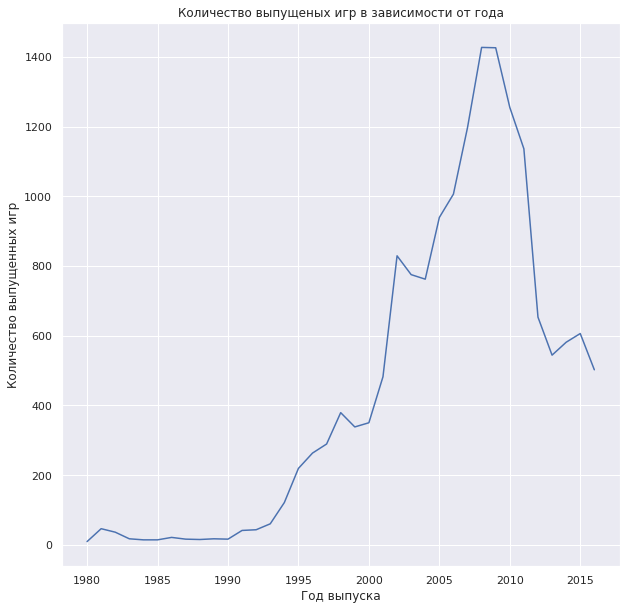

In [40]:
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(10,10)})
sns.lineplot(data = games_by_year, x = 'year_of_release', y = 'name')
plt.title("Количество выпущеных игр в зависимости от года")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр");

**Вывод**

Рассмотрели данные о выпуске игр в разные годы.
- Самые старые игры в датасете: выпуск 1980 года
- Самые новые игры: выпуск 2016 года

Как видно из графика, с началом 90-х, происходит резкий рост количества выпускаемых игр. Это связано с развитием компьютерных технологий  и повышением производительности компьютеров. Пик приходится на 2008-2009 годы. После 10 года происходит спад. Возможно, спад связан с экономическим кризисом.

Можно не рассматривать данные об играх, выпуск которых был раньше 95 года, вследствие малого количества выпущенных игр.

**Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [41]:
top_sales = data.pivot_table(index = 'platform',
                             values = 'overall_sales',
                             aggfunc = 'sum').sort_values(by = 'overall_sales', ascending = False)

In [42]:
top_sales.head(10)

,overall_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


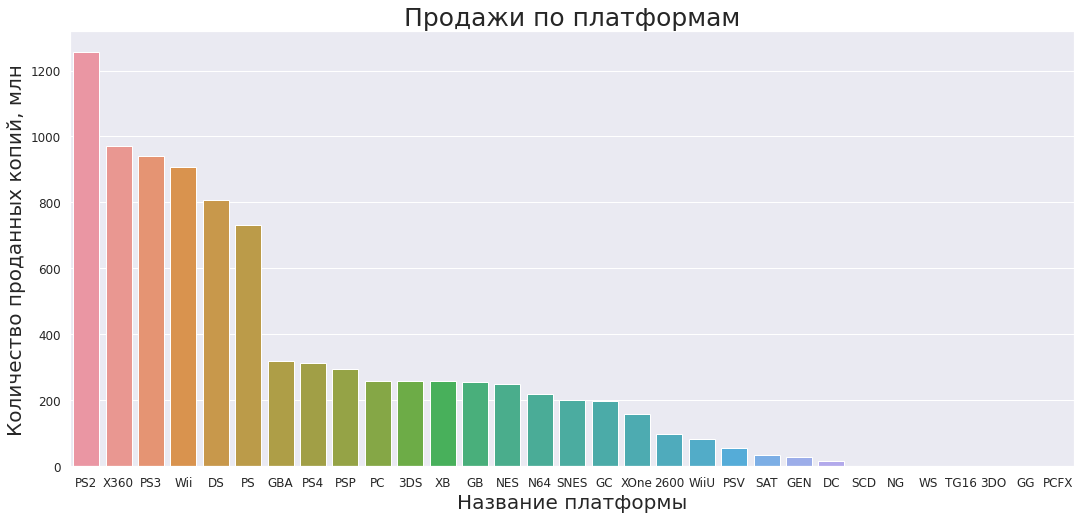

In [43]:
plt.figure(figsize = (18,8))
sns.set_style('darkgrid')
ax = sns.barplot(x = top_sales.index, y = top_sales.overall_sales,
               data = top_sales)
plt.title('Продажи по платформам', fontsize = 25)
plt.xlabel('Название платформы', fontsize = 20)
plt.xticks(fontsize = 12)
plt.ylabel('Количество проданных копий, млн', fontsize = 20)
plt.yticks(fontsize = 12);

In [44]:
top_sales_grouped = top_sales.reset_index()

In [45]:
top_sales_grouped.head()

,platform,overall_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


In [46]:
top10_platforms = top_sales_grouped.head(10)

In [47]:
top10_platforms

,platform,overall_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [48]:
top5_platforms = top_sales_grouped.head()

In [49]:
top5_platforms

,platform,overall_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


In [50]:
all_platforms = top_sales_grouped.platform.unique()

In [51]:
all_platforms

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC',
       '3DS', 'XB', 'GB', 'NES', 'N64', 'SNES', 'GC', 'XOne', '2600',
       'WiiU', 'PSV', 'SAT', 'GEN', 'DC', 'SCD', 'NG', 'WS', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

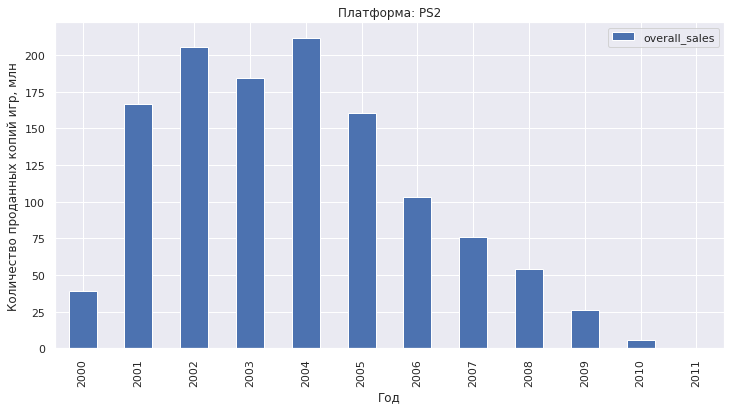

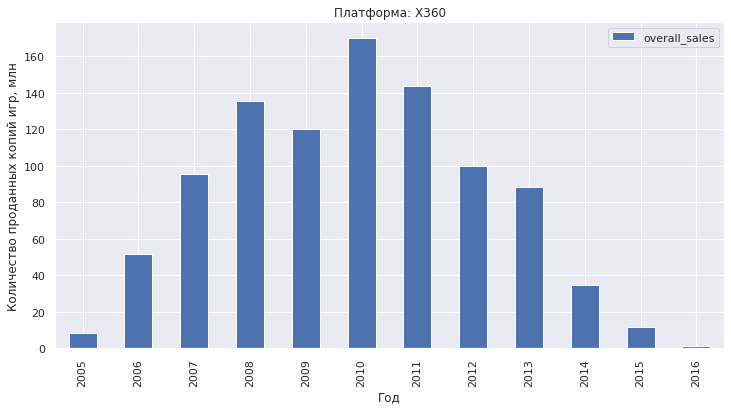

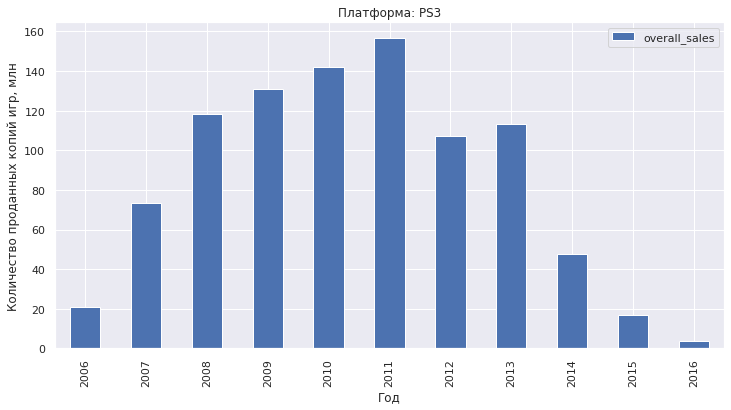

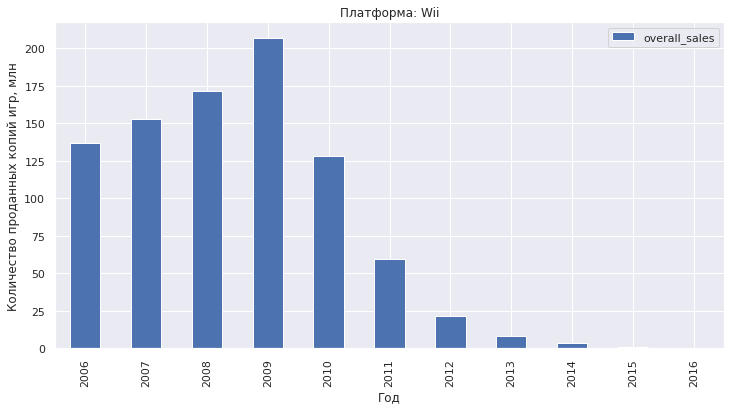

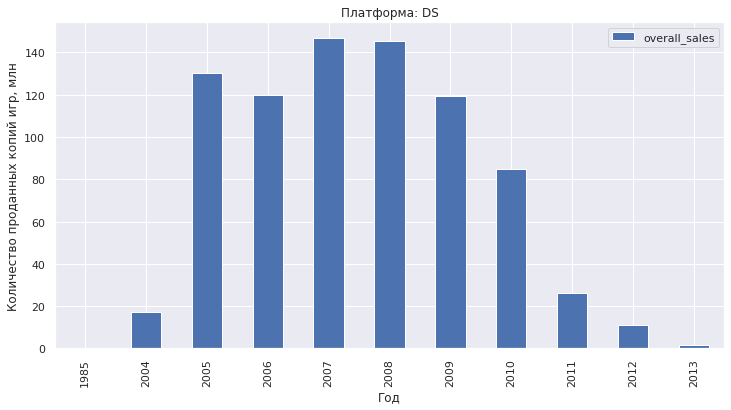

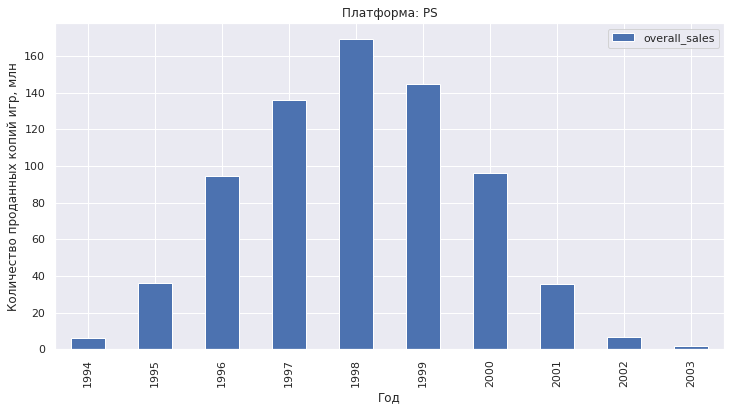

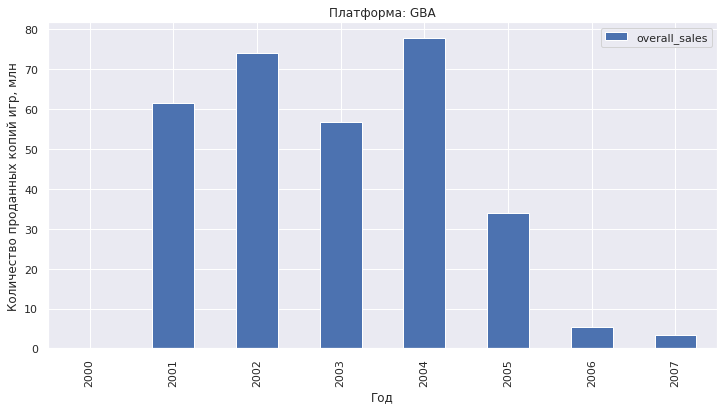

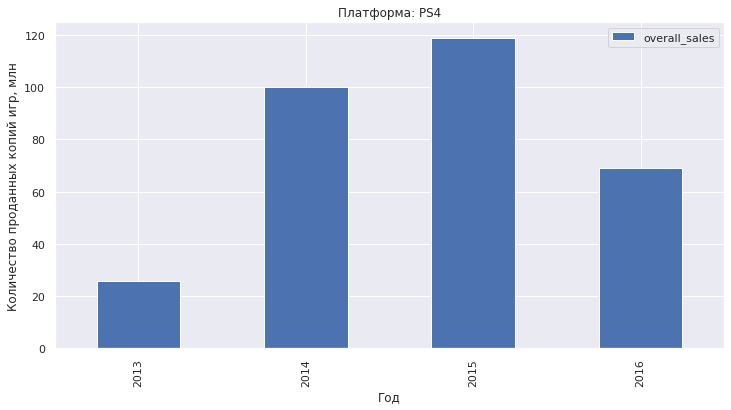

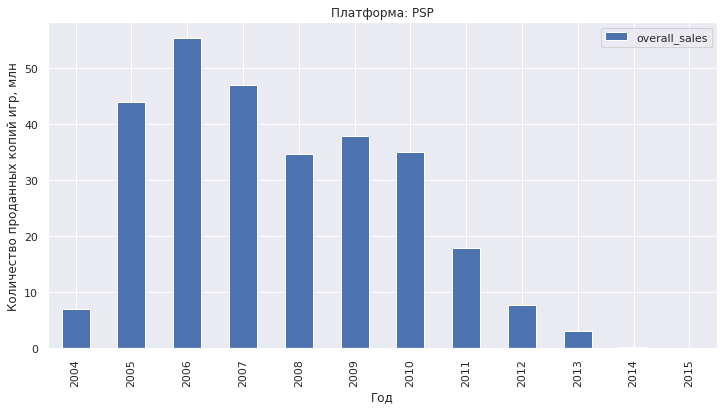

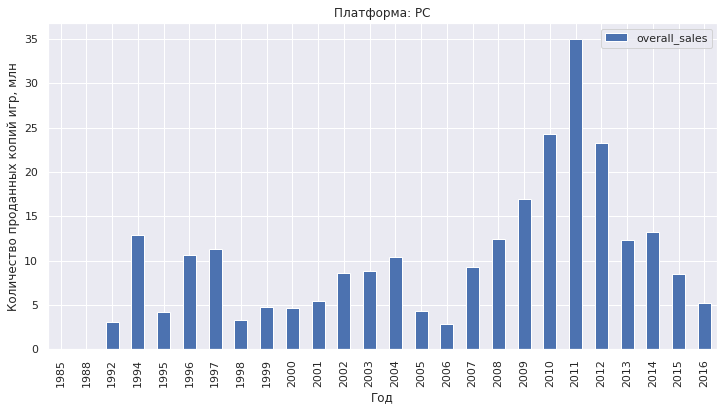

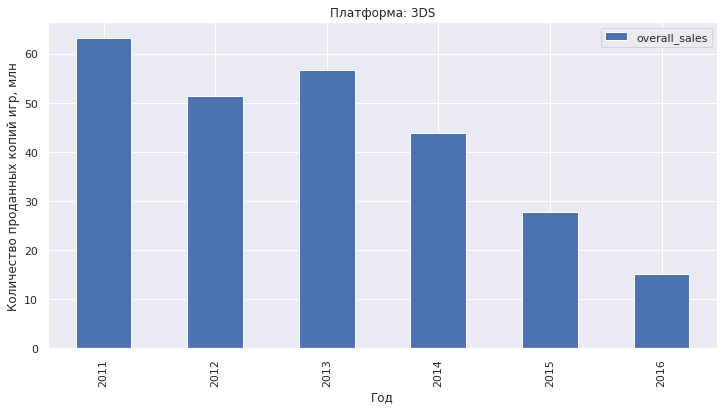

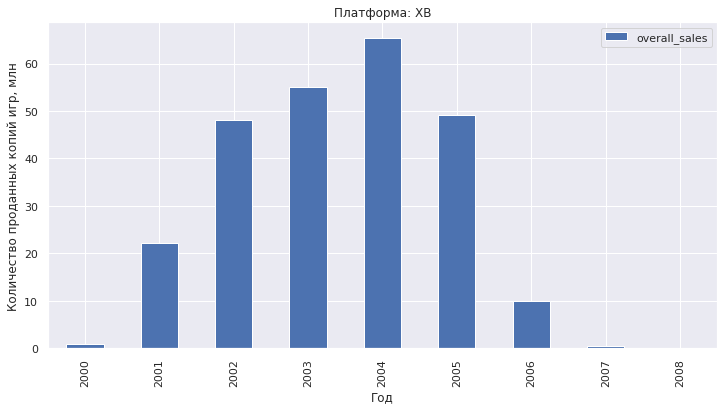

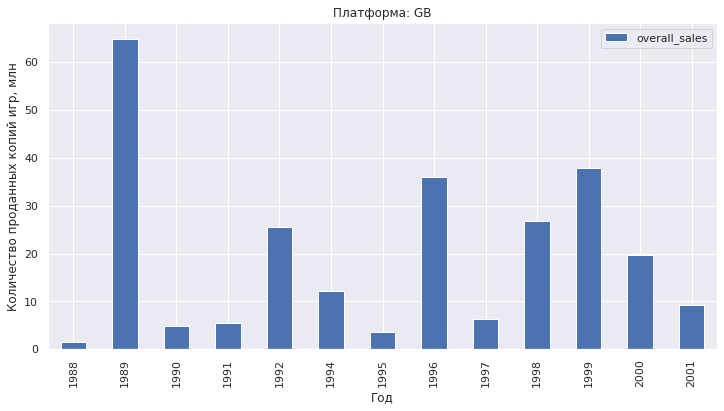

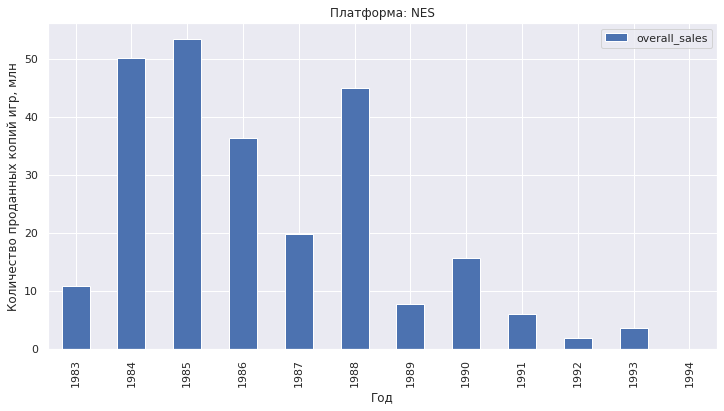

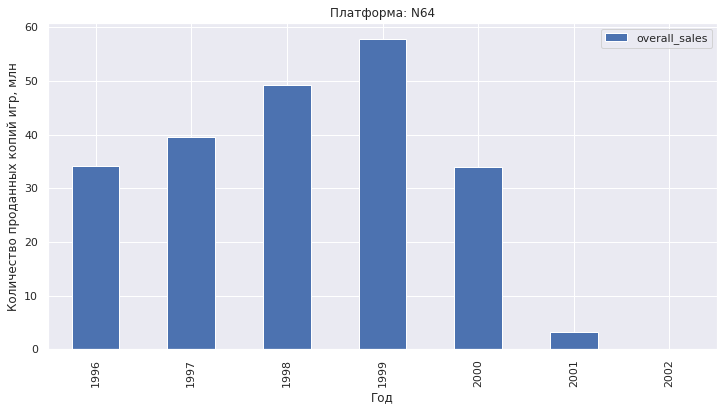

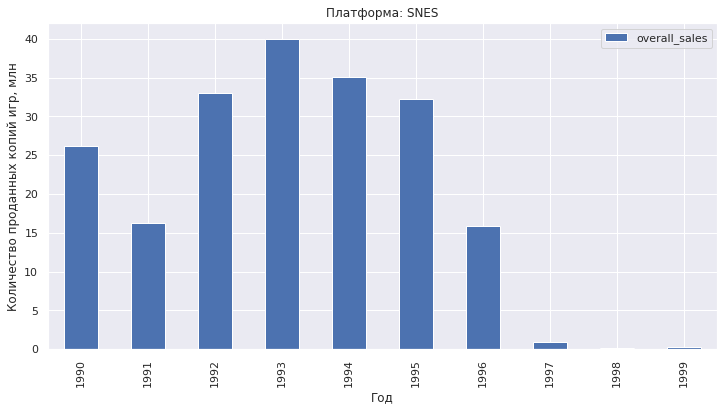

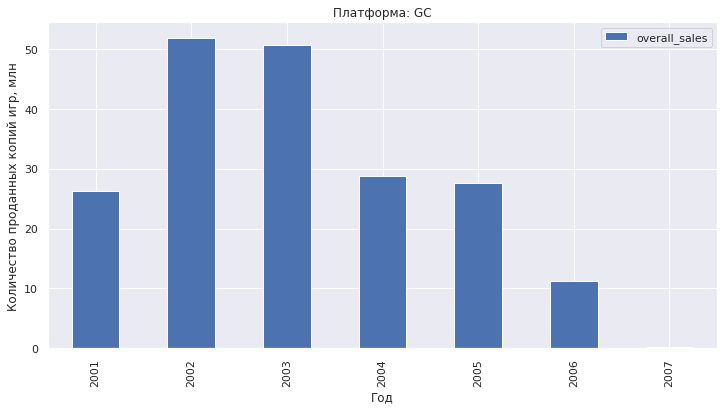

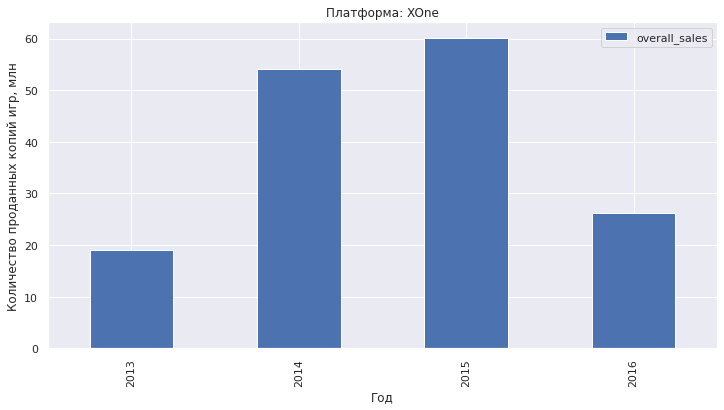

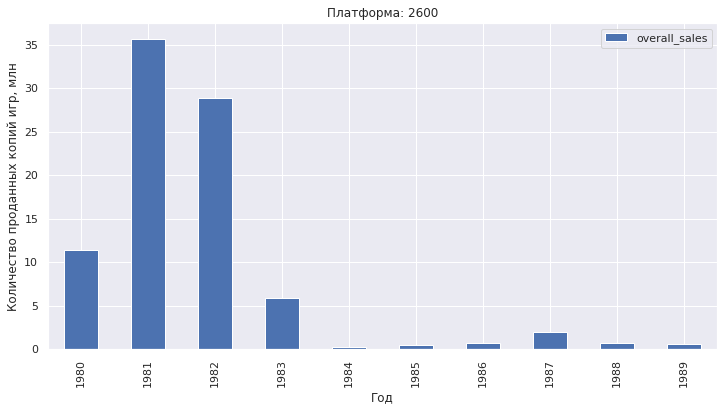

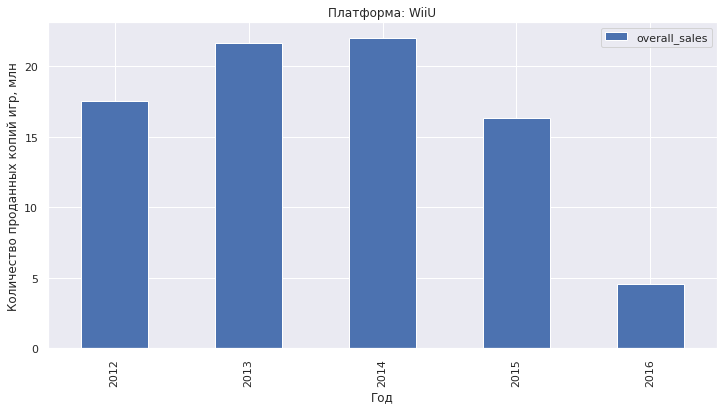

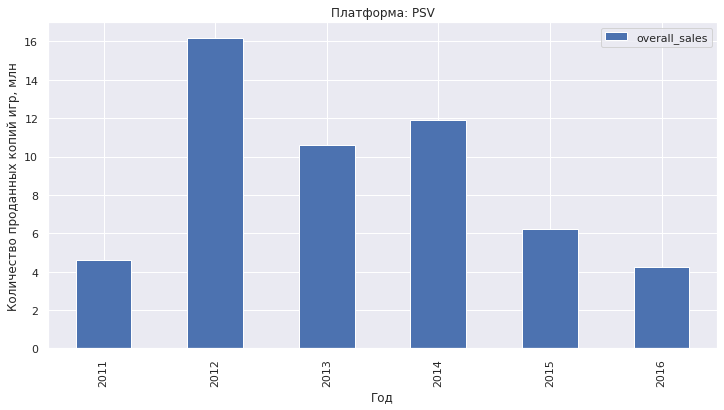

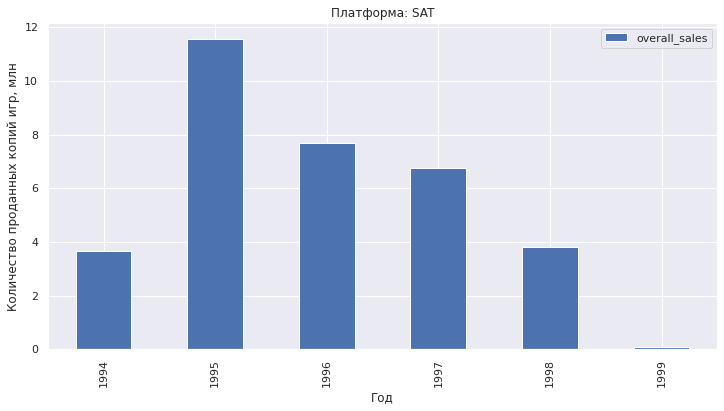

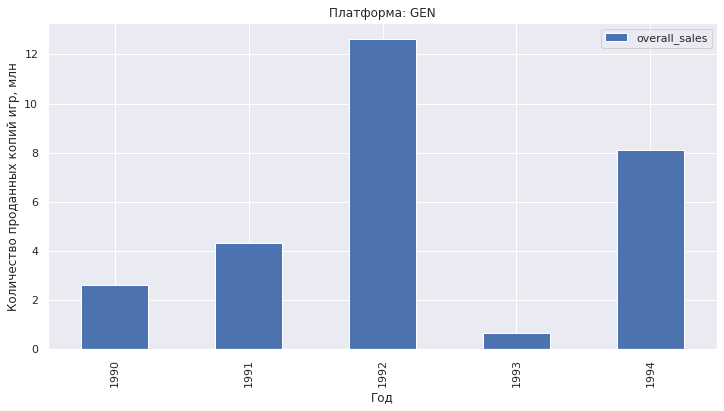

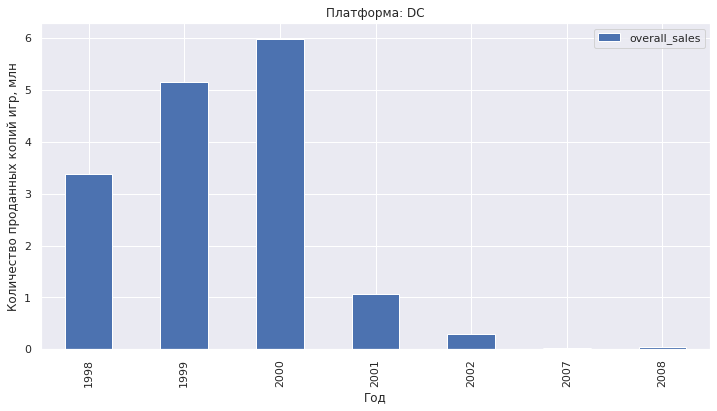

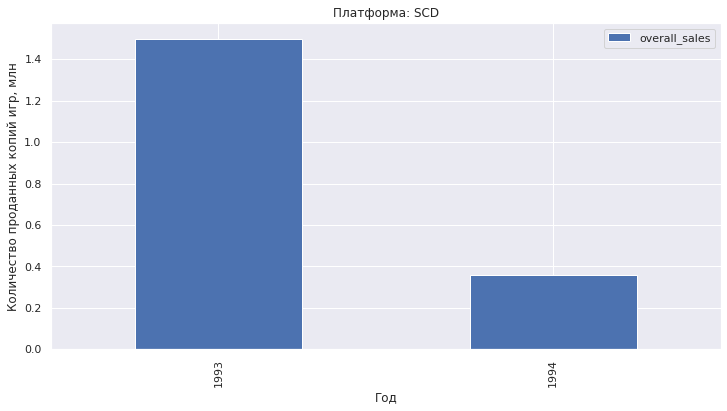

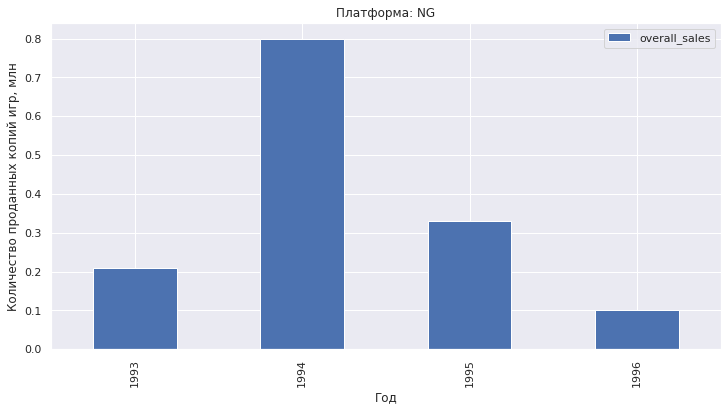

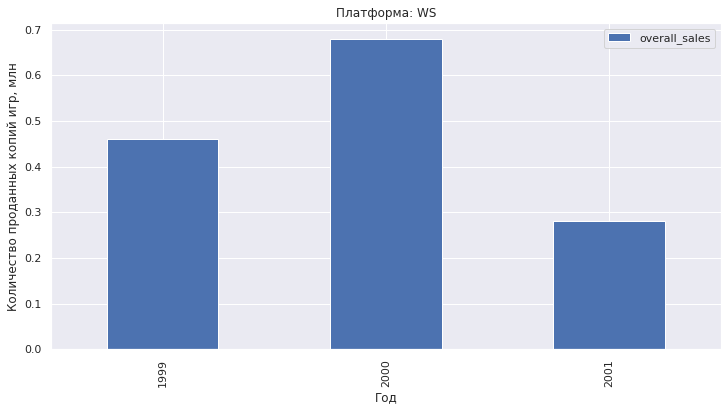

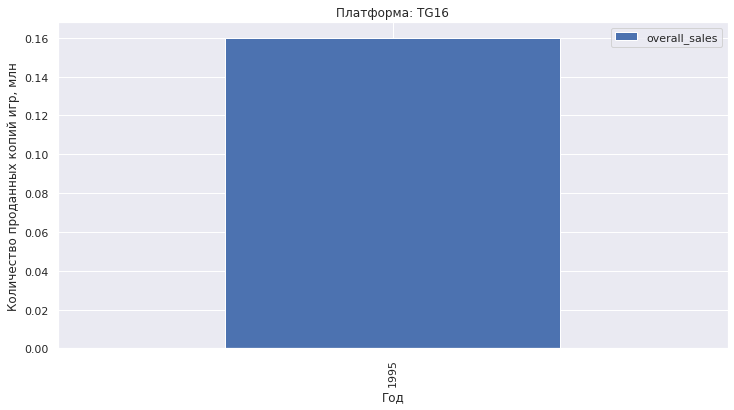

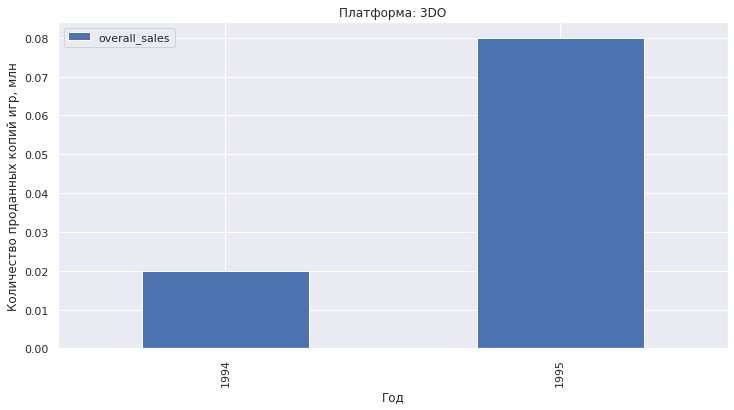

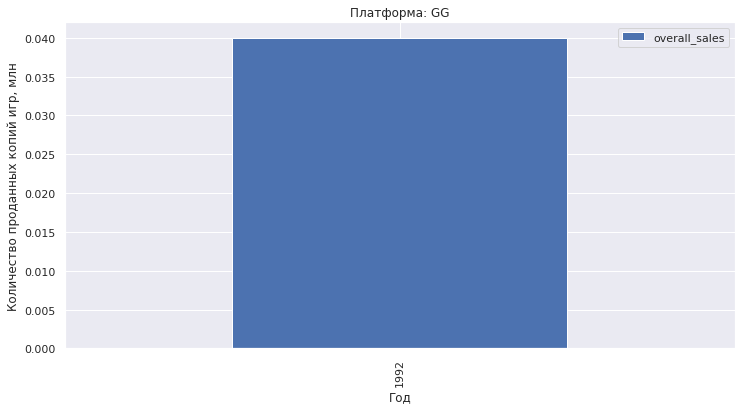

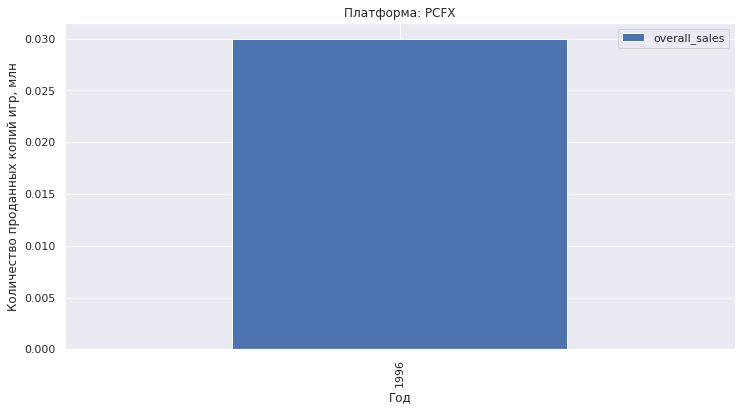

In [52]:
for platform in all_platforms:
    data[data['platform'] == platform].pivot_table(index = 'year_of_release', 
                                                   values = 'overall_sales', 
                                                   aggfunc = 'sum').plot(
kind = 'bar', figsize = (12,6))
    plt.title('Платформа: ' + platform)
    plt.xlabel('Год')
    plt.ylabel('Количество проданных копий игр, млн');


**Вывод**

Рассматривая диаграммы, можем сделать вывод, что, в среднем, платформа существует около **7 - 9** лет.

**Топ-5 платформ** по количеству проданных копий игр:
- PS2
- X360
- PS3
- Wii
- DS

Абсолютным долгожителем является платформа **PC** - 24 года. И крайне странно видеть, что данная платформа не входит в топ-5 лидеров по продаже игр. Предполагаю, что это связано с распространенным среди пользователей пк "пиратством".

Большинство платформ из датасета уже не актуальны, на момент 2016 года могу выделить несколько актуальных платформ:
- PC
- XBOX ONE
- PS4
- NINTENDO 3DS
- PS VITA


**Определим актуальный период, данные которого помогут в дальнейшем анализе**

Как и писал выше - большая часть платформ не акутальна, соответственно, при прогнозе на 17 год их использовать нельзя. 
Пик количества выпущенных игр приходится на 2008-2009 годы, дальше происходит резкий спад. Считаю, что данные нужно с 2011 года, т.к. индустрия быстро развивается и может попасться в данных много платформ, которые уже по факту мертвы. 

In [53]:
actual_data = data.query('year_of_release >= 2011')

In [54]:
actual_data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales
2757,Assassin's Creed: Revelations,PC,2011,Action,0.14,0.48,0.00,0.12,80.0,7.4,M,0.74
6245,Ace Attorney 6,3DS,2016,Adventure,0.00,0.00,0.27,0.00,NaN,NaN,NaN,0.27
11020,May's Mystery: Forbidden Memories,DS,2011,Puzzle,0.04,0.04,0.00,0.01,70.0,NaN,E,0.09
9373,Life is Strange,XOne,2016,Adventure,0.09,0.03,0.00,0.01,85.0,8.7,M,0.13
2954,Plants vs. Zombies: Garden Warfare,XOne,2014,Shooter,0.39,0.23,0.00,0.06,76.0,7.4,E10+,0.68


**Выберем несколько потенциально прибыльных платформ**

In [55]:
potential_platforms = actual_data.query('platform in @top10_platforms.platform').pivot_table(index = 'year_of_release',
                                                            columns = 'platform',
                                                            values = 'overall_sales',
                                                            aggfunc = 'sum')

In [56]:
potential_platforms

platform,DS,PC,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,
2011,26.18,35.03,0.45,156.78,NaN,17.82,59.65,143.84
2012,11.01,23.22,NaN,107.36,NaN,7.69,21.71,99.74
2013,1.54,12.38,NaN,113.25,25.99,3.14,8.59,88.58
2014,NaN,13.28,NaN,47.76,100.00,0.24,3.75,34.74
2015,NaN,8.52,NaN,16.82,118.90,0.12,1.14,11.96
2016,NaN,5.25,NaN,3.60,69.25,NaN,0.18,1.52


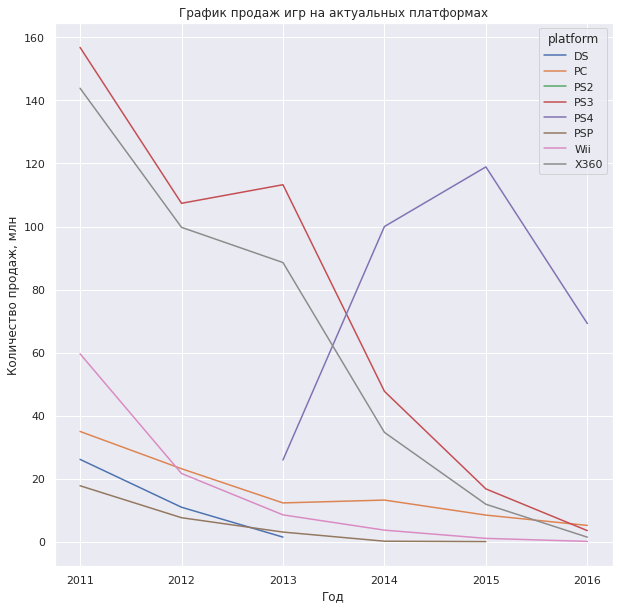

In [57]:
potential_platforms.plot()
plt.xlabel('Год')
plt.ylabel('Количество продаж, млн')
plt.title('График продаж игр на актуальных платформах');

**Вывод**

- PSP - Падение продаж наблюдалось вплоть до 2015 года. После 2015 продажи прекратились и платформа умерла. 
- DS - Такая же история, как и у PSP, только платформа продержалась меньше - продажи остановили в 2013 году.
- Wii - была актуальна в 2011 году, это нам показывает 60 млн проданных копий игр на нее. После 2011 резкий спад. К 2016 году продажи скатились к 0, соответственно платформа более не актуальна. 
- PC - это долгожитель. График показывает примерно 38 млн проданных копий в 11 году, а потом идет спад продаж, который продолжается и в 16 году. В целом, стабильная платформа, которая живет больше 20 лет, но рассчитывать на рост продаж не стоит.
- PS3 - заместил своего собрата PS2, видим пик продаж в 11 году, а потом резкий спад в 2013, который связан с выпуском новой версии - PS4. В 2016 платформа еще не умерла, но нельзя ее назвать актуальной.
- X360 - пик популярности приходится также на 2011 год, дальше год за годом идет спад. В целом, ситуация как у PS3 (эту версию заменит новая - XOne).
- PS4 - Пик популярности - 2015 год. По опыту старших поколений этой консоли, можно сказать, что будет актуальна еще года 3-4.

Можно выделить 2 потенциально прибыльные платформы:
- `PS4`
- `XOne`

В принципе, сюда можно отнести и `PC`, т.к. на этой платформе всегда стабильные продажи.

В ближайшие год-два прекратятся продажи на платформах: `PS3`, `X360`.

**Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам.**

Составим список платформ, вышедших недавно:

In [58]:
new_platforms = ['PC', 'XOne', 'PS4', '3DS', 'PSV']

In [59]:
global_sales = actual_data.query('platform in @new_platforms')

Избавимся также от выбросов

In [60]:
global_sales = global_sales.query('overall_sales < 1.5')

In [61]:
global_sales.overall_sales.describe()

count    1830.000000
mean        0.210137
std         0.284311
min         0.010000
25%         0.030000
50%         0.090000
75%         0.250000
max         1.490000
Name: overall_sales, dtype: float64

Рассмотрим глобальные продажи по платформам + на количество игр для каждой платформы

In [62]:
global_sales.groupby('platform')['overall_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,479.0,0.220209,0.278006,0.01,0.045,0.11,0.265,1.47
PC,378.0,0.183413,0.256525,0.01,0.030,0.08,0.220,1.42
PS4,329.0,0.269362,0.317742,0.01,0.050,0.12,0.370,1.49
PSV,427.0,0.117822,0.180679,0.01,0.020,0.05,0.130,1.47
XOne,217.0,0.326313,0.379018,0.01,0.050,0.16,0.470,1.49


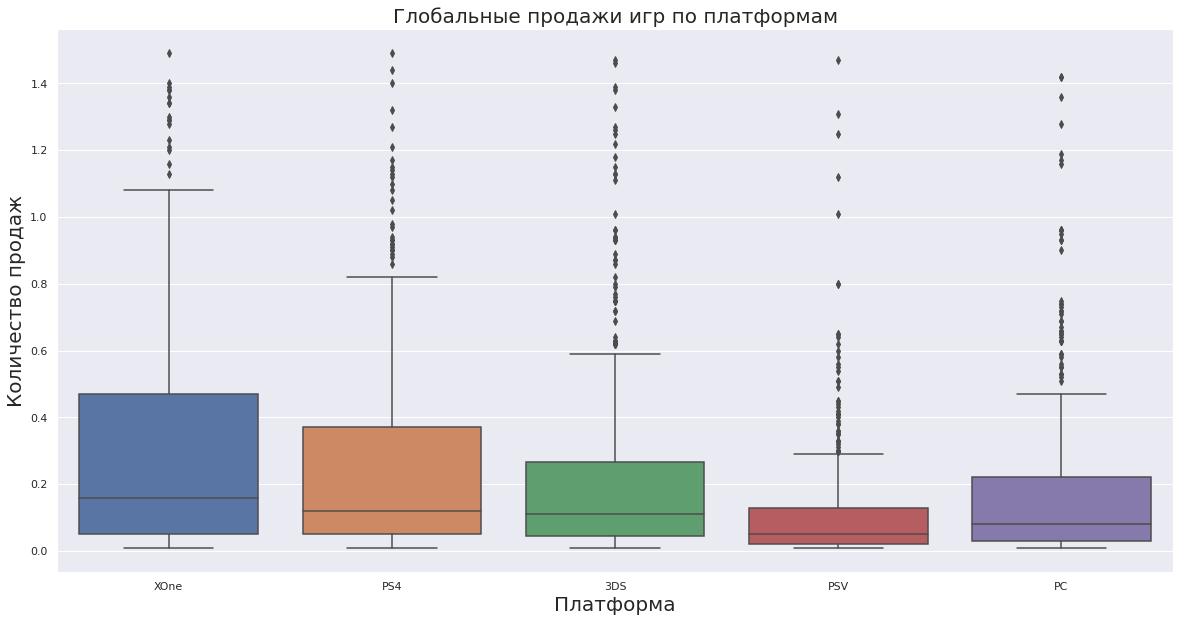

In [63]:
plt.figure(figsize = (20,10))
sns.boxplot(data = global_sales, x = 'platform', y = 'overall_sales')
plt.xlabel('Платформа', fontsize = 20)
plt.ylabel('Количество продаж', fontsize = 20)
plt.title('Глобальные продажи игр по платформам', fontsize = 20);

**Вывод**

Больше всего продаж у XOne. Дальше идет PS4 и 3DS. Возможно, это связано с тем, что сама консоль стоит дешевле, а также игры на нее дешевле, чем у остальных платформ. 
Меньше всего продаж у PSVita. 

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

In [64]:
ds_3 = actual_data.query("platform == '3DS'")

Проверим корреляцию между оценками пользователей, оценками критиков  и количеством проданных копий.

In [65]:
ds_3 = ds_3[['critic_score','user_score', 'overall_sales']]

In [66]:
ds_3.corr()

,critic_score,user_score,overall_sales
critic_score,1.000000,0.745222,0.348740
user_score,0.745222,1.000000,0.222078
overall_sales,0.348740,0.222078,1.000000


Построим диаграмму рассеяния(оценки пользователей)

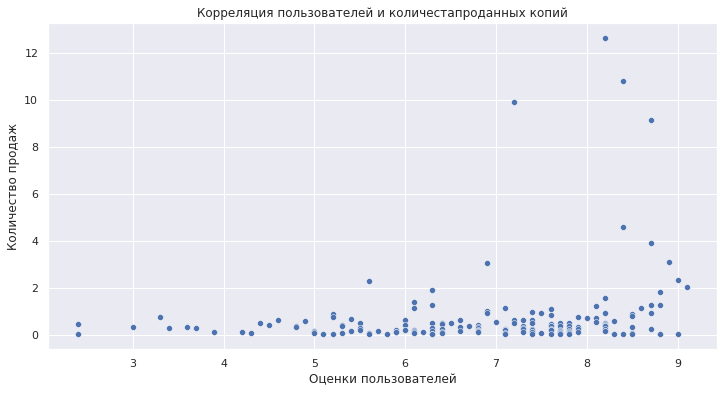

In [67]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'user_score', y = 'overall_sales', data = ds_3)
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.title('Корреляция пользователей и количестапроданных копий');

Построим диаграмму рассеяния(оценки критиков)

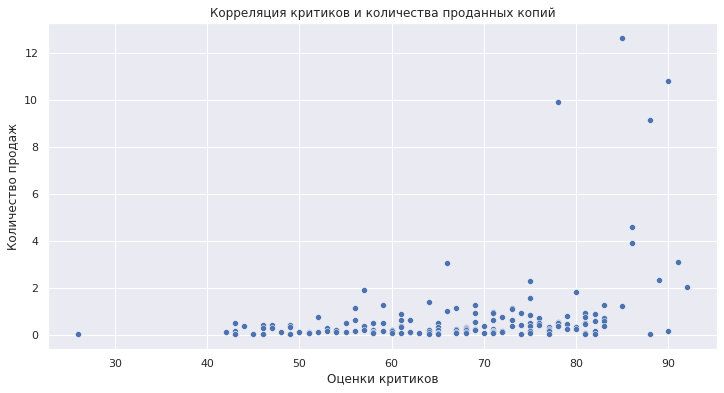

In [68]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'critic_score', y = 'overall_sales', data = ds_3)
plt.xlabel('Оценки критиков')
plt.ylabel('Количество продаж')
plt.title('Корреляция критиков и количества проданных копий');

**Вывод**

Рассматривая диаграммы, можно сказать, что оценки пользователей и критиков в целом совпадают. Единственное, у пользователей получается больше отрицательных оценок, чем у критиков.

Также можно сказать, что количество продаж не особо зависит от оценок пользователей или критиков.

**Рассмотрим продажи игр на других платформах**

Платформа `PC`

In [69]:
pc = actual_data.query('platform == "PC"')

In [70]:
pc_cor = pc[['critic_score','user_score', 'overall_sales']]

In [71]:
pc_cor.corr()

,critic_score,user_score,overall_sales
critic_score,1.000000,0.464815,0.314185
user_score,0.464815,1.000000,-0.048967
overall_sales,0.314185,-0.048967,1.000000


Платформа `XOne`

In [72]:
xone = actual_data.query('platform == "XOne"')

In [73]:
xone_cor = xone[['critic_score','user_score', 'overall_sales']]

In [74]:
xone_cor.corr()

,critic_score,user_score,overall_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
overall_sales,0.416998,-0.068925,1.000000


Платформа `PS4`

In [75]:
ps4 = actual_data.query('platform == "PS4"')

In [76]:
ps4_cor = ps4[['critic_score','user_score', 'overall_sales']]

In [77]:
ps4_cor.corr()

,critic_score,user_score,overall_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
overall_sales,0.406568,-0.031957,1.000000


Платформа `PSV`

In [78]:
psv = actual_data.query('platform == "PSV"')

In [79]:
psv_cor = psv[['critic_score','user_score', 'overall_sales']]

In [80]:
psv_cor.corr()

,critic_score,user_score,overall_sales
critic_score,1.000000,0.734300,0.131763
user_score,0.734300,1.000000,0.013489
overall_sales,0.131763,0.013489,1.000000


**Вывод**

Рассматривая корреляцию оценок пользователей и критиков с глобальными продажами, можно сказать, что оценки критиков немного влияют на количество продаж,в то время как оценки пользователей не играют особой роли(кроме платформы ps4). 

**Рассмотрим распределение игр по жанрам**

Создадим сводную таблицу с продажами по жанрам.

In [137]:
top_genre = actual_data.pivot_table(index = 'genre',
                       values = 'overall_sales',
                       aggfunc = 'sum').sort_values(ascending = False,
                                                      by = 'overall_sales')

In [138]:
top_genre

,overall_sales
genre,
Action,557.80
Shooter,402.91
Role-Playing,245.63
Sports,237.15
Misc,139.42
Platform,88.68
Racing,88.31
Fighting,66.90
Simulation,50.26


In [153]:
median_sales = actual_data.pivot_table(index = 'genre',
                                      values = 'overall_sales',
                                      aggfunc = np.median)

In [159]:
median_sales.sort_values(by = ('overall_sales'), ascending = False)

,overall_sales
genre,
Shooter,0.410
Sports,0.200
Platform,0.185
Fighting,0.180
Racing,0.160
Role-Playing,0.150
Action,0.130
Misc,0.130
Simulation,0.110


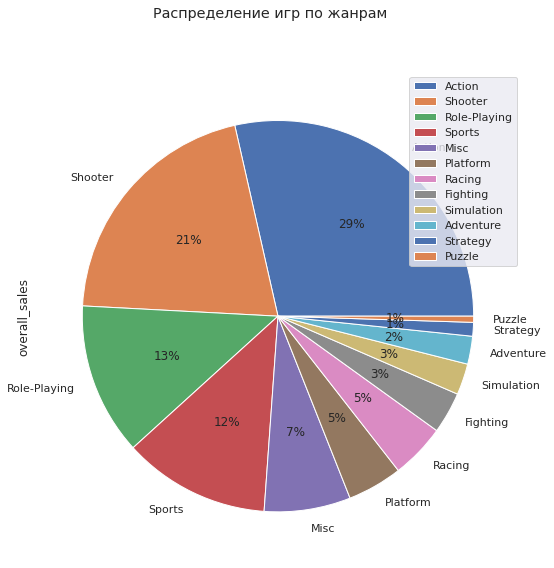

In [160]:
top_genre.plot(
    kind = 'pie', 
    autopct = '%1.0f%%',
    figsize=(9,9),
    subplots=True,
    title = 'Распределение игр по жанрам');

**Вывод**

- Самый распространенный жанр - `Action`. Большой отрыв от других жанрав, `Action` занимает 29% от всех жанров игр. Дальше идут `Shooter`, `Role-Playing` c 21 и 13 процентами соответственно.
- Меньше всего игр в жанре `Puzzle`, `Strategy`.

Думаю, что большое количество выпускаемых игр в жанрах `Action`, `Shooter` связан с их соревновательной составляющей, а также с тем, что такие жанры отлично подходят для компании друзей, соответственно, можно привлечь большее количество покупателей, устраивая турниры по таким играм или засчет сарафанного радио среди друзей. Чего нельзя сказать о `Puzzle` или `Strategy`.

Рассматривая медианные продажи по жанрам, лидирует жанр `Shooter`. А самый многочисленный жанр игр `Action` находится на 7 месте.

## Шаг 4. Составить портрет пользователя каждого региона

**Рассмотрим NA (Северную Америку)**

In [161]:
na_gamers = actual_data.pivot_table(index = 'platform', 
                                    values = 'na_sales', 
                                    aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales')

In [162]:
na_gamers

,na_sales
platform,
X360,226.80
PS3,168.26
PS4,108.74
XOne,93.12
3DS,82.65
Wii,48.56
WiiU,38.10
PC,29.88
DS,18.86


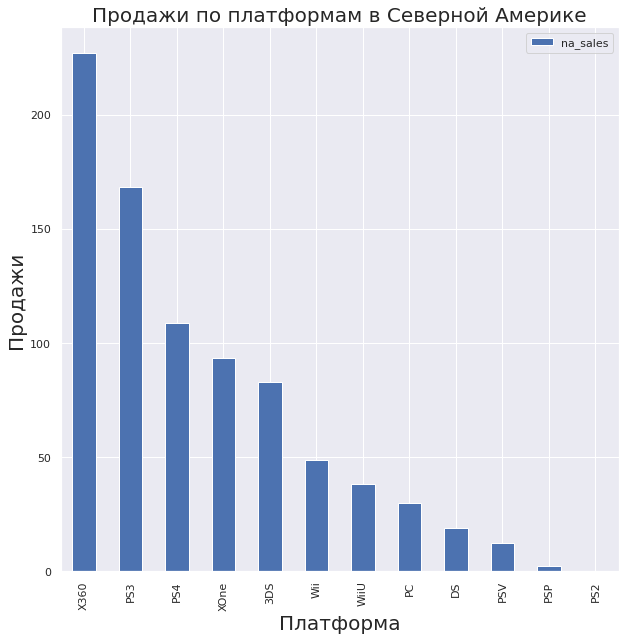

In [163]:
na_gamers.plot(kind = 'bar')
plt.xlabel('Платформа', fontsize = 20)
plt.ylabel('Продажи', fontsize = 20)
plt.title('Продажи по платформам в Северной Америке', fontsize = 20);

**Рассмотрим EU (Европу)**

In [164]:
eu_gamers = actual_data.pivot_table(index = 'platform', 
                                    values = 'eu_sales', 
                                    aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales')

In [165]:
eu_gamers

,eu_sales
platform,
PS3,163.10
PS4,141.09
X360,117.10
3DS,61.27
PC,56.70
XOne,51.59
Wii,29.60
WiiU,25.13
PSV,13.07


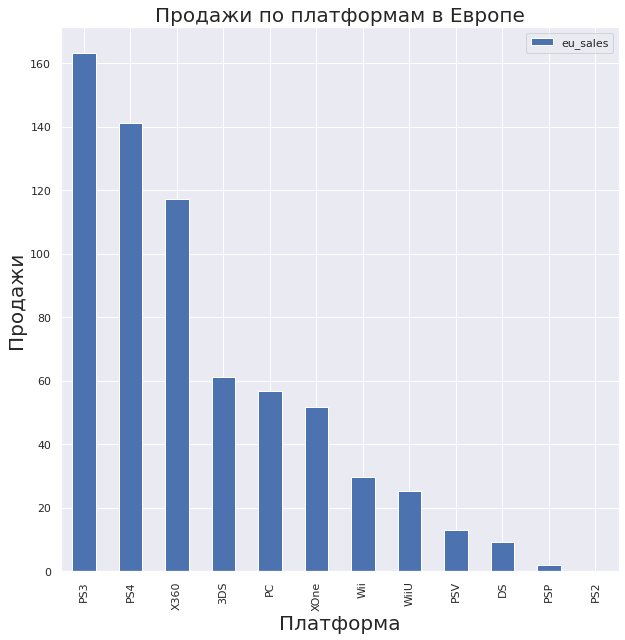

In [166]:
eu_gamers.plot(kind = 'bar')
plt.xlabel('Платформа', fontsize = 20)
plt.ylabel('Продажи', fontsize = 20)
plt.title('Продажи по платформам в Европе', fontsize = 20);

**Рассмотрим JP (Японию)**

In [167]:
jp_gamers = actual_data.pivot_table(index = 'platform', 
                                    values = 'jp_sales', 
                                    aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales')

In [168]:
jp_gamers 

,jp_sales
platform,
3DS,100.62
PS3,49.39
PSP,24.04
PSV,21.84
PS4,15.96
WiiU,13.01
Wii,8.97
DS,8.04
X360,3.35


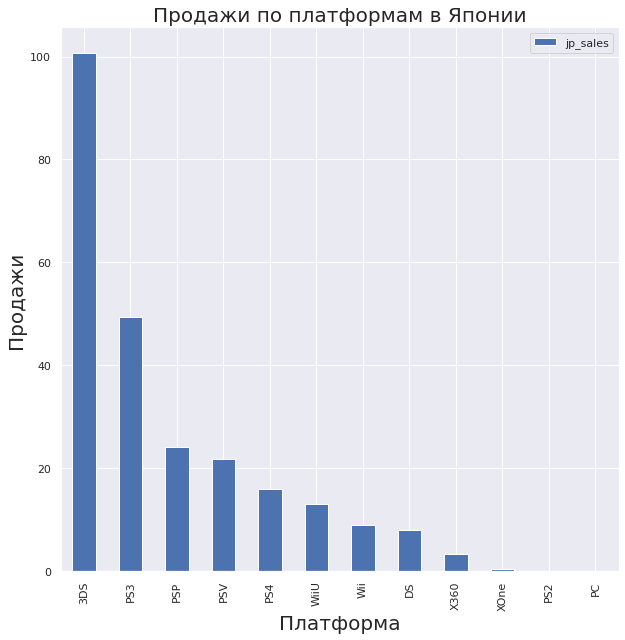

In [169]:
jp_gamers.plot(kind = 'bar')
plt.xlabel('Платформа', fontsize = 20)
plt.ylabel('Продажи', fontsize = 20)
plt.title('Продажи по платформам в Японии', fontsize = 20);

**Вывод**

- Северная Америка
    - Самая популярная платформа - `X360`. Скорее всего, это из-за того, что платформа сделана в Америке. Дальше идут `PS3` и `Wii` - японские платформы. 
- Европа
    - Популярнее всего платформа `PS3`. На втором месте `X360`. Ситуация аналогичная, как у NA.
- Япония
    - Топом является 3DS. Да и в целом топ-5 занят только японскими платформами. Американская платформа `X360` встречается только на 9 месте.
    
Подводя итог, можно сказать, что японцы захватили мировой рынок игр. Их платформы пользуются популярностью как в Европе, так и в США.

**Определим самые популярные жанры в зависимости от региона игроков**

**Северная Америка**

In [93]:
actual_data.pivot_table(index = 'genre', 
                        values = 'na_sales', 
                        aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales')

,na_sales
genre,
Action,230.92
Shooter,194.43
Sports,108.70
Role-Playing,83.78
Misc,69.69
Platform,38.28
Racing,31.98
Fighting,31.63
Simulation,15.37


**Европа**

In [94]:
actual_data.pivot_table(index = 'genre', 
                        values = 'eu_sales', 
                        aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales')

,eu_sales
genre,
Action,199.12
Shooter,148.02
Sports,88.48
Role-Playing,62.30
Racing,40.58
Misc,39.72
Platform,30.07
Simulation,19.72
Fighting,16.24


**Япония**

In [95]:
actual_data.pivot_table(index = 'genre', 
                        values = 'jp_sales', 
                        aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales')

,jp_sales
genre,
Role-Playing,79.87
Action,63.62
Misc,17.60
Fighting,12.38
Platform,12.13
Adventure,12.07
Shooter,11.92
Simulation,11.64
Sports,11.09


**Вывод**

Предпочтения в жанрах американцев и европейцев почти ничем не отличаются - в топе находятся `Action`, `Shooter`, `Sports`. Связано это с предпочтением людей, опять же утверждаю, что американцы и европейцы больше любят отдыхать в компаниях и включить поиграть какую-нибудь `Action` или `Sport` игру. В то время как у японцев идет предпочтение поиграть в одиночку, отсюда и их самый продаваемый жанр - `Role-Playing`

**Узнаем, влияет ли рейтинг ESRB на продажи в отдельном регионе**

In [96]:
pd.options.mode.chained_assignment = None

actual_data['reg'] = actual_data.eu_sales + actual_data.jp_sales + actual_data.na_sales

In [97]:
actual_data['reg']

16       17.09
23       14.86
29       13.41
31       12.25
33       13.82
         ...  
16701     0.01
16705     0.01
16708     0.01
16710     0.01
16712     0.01
Name: reg, Length: 4022, dtype: float64

In [98]:
esrb = actual_data.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')

In [99]:
esrb

,eu_sales,jp_sales,na_sales
rating,,,
E,141.73,36.68,170.17
E10+,78.00,11.23,117.72
EC,0.00,0.00,0.42
M,250.26,26.14,308.45
RP,0.03,0.00,0.00
T,83.16,33.39,109.31


**Вывод**

Да, можно с уверенностью сказать, что возрастной рейтинг влияет на продажи в регионах. Так, игры с рейтингом `M` (17+), отлично продаются в Европе и Северной Америке, но не в Японии.

## Шаг 5. Проверить гипотезы

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

H_0: Средние пользовательские оценки платформы `XOne` = средним пользовательским оценкам `PC`

H_1: Средние пользовательские оценки платформы `XOne` > средних пользовательских оценок `PC`

Посчитаем средний пользовательский рейтинг платформы `XOne`

In [100]:
xone = (actual_data[(actual_data['platform'] == 'XOne') &  
                               (actual_data['user_score'] > 0)]['user_score'])

In [101]:
round(xone.mean(), 2)

6.52

Посчитаем средний пользовательский рейтинг платформы `PC`

In [102]:
pc = actual_data[(actual_data['platform'] == 'PC') &  
                      (actual_data['user_score'] > 0)]['user_score']

In [103]:
round(pc.mean(), 2)

6.45

In [104]:
results = st.ttest_ind(xone, 
                       pc,
                       alternative = 'greater')

alpha = .05

print('p-значение: ', round(results.pvalue, 2))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение:  0.31
Не удалось отвергнуть нулевую гипотезу


**Вывод**

Проверили гипотезу, и не удалось отвергнуть нулевую гипотезу о том, что средние рейтинги платформ XboxOne и PC равны.

**Средние пользовательские рейтинги жанров Action и Sports разные.**

H_0: Средние пользовательские оценки жанра `Action` = средним пользовательским оценкам `Sports`

H_1: Средние пользовательские оценки жанра `Action` > средних пользовательских оценок `Sports`

Посчитаем средний пользовательский рейтинг жанра `Action`

In [105]:
act = actual_data[(actual_data['genre'] == 'Action') &  
                     (actual_data['user_score'] > 0)]['user_score']

In [106]:
round(act.mean(), 2)

6.78

Посчитаем средний пользовательский рейтинг жанра `Sports`

In [107]:
sport = actual_data[(actual_data['genre'] == 'Sports') &  
                     (actual_data['user_score'] > 0)]['user_score']

In [108]:
round(sport.mean(), 2)

5.65

In [109]:
results = st.ttest_ind(act, 
                       sport,
                       alternative = 'greater')

alpha = .05

print('p-значение: ', round(results.pvalue, 2))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение:  0.0
Отвергаем нулевую гипотезу


**Вывод**

Проверили гипотезу, отвергаем нулевую гипотезу, т.к. средние пользовательские рейтинги игр в жанре `Action` и `Sports` разные.

## Шаг 6. Общий вывод

Загрузили датафрейм и рассмотрели данные.

Привели все названия столбцов к нижнему регистру. 

Рассмотрели пропуски в столбцах. Больше всего оказалось в столбцах:
- `critic_score` : 51.3%
- `users_score` : 54.6%
- `rating` : 40.5%

Сделал вывод, что пропуски в оценках возможно вызваны тем, что игры только анонсировали, либо же игры были выпущены достаточно давно и их попросту не оценивают. Про рейтинг предположу, что ESRB(Entertainment Software Rating Board) была основана не так давно, и поэтому не всем играм успели присвоить рейтинг.

- Привели столбец `year_of_release` к целочисленному типу, для удобства просмотра. 
- Заменили значения TBD в столбце `user_score` на NaN, потом поменяли тип данных на float
- Посчитали суммарные продажи по всем регионам и добавили информацию в новый столбец `overall_sales`

Определили, что рост продаваемости игр начинается с 90-х годов. Рост вызван развитием компьютерных технологий. Пиком были 2008 и 2009 годы, затем идет спад, связанный, вероятно с экономическим кризисом.

С помощью графиков проанализировали и пришли к выводу, что большинство платформ, представленных в датасете уже не актуальны. 

Из актуальных могу выделить:
- `PC`
- `XBOX ONE`
- `PS4`
- `NINTENDO 3DS`
- `PS VITA`

Выделил топ-5 платформ по количеству проданных копий игр за все время:
- `PS2`
- `X360`
- `PS3`
- `Wii`
- `DS`

Определил актуальный период (данные нужно брать, начиная с 2008 года), который подойдет для прогноза на 2017 год.

Выбрал несколько потенциально прибыльных платформ:
- `PS4`
- `XONE`

Рассмотрел глобальные продажи по платформам. Больше всего продаж оказалось у `XONE`. 

Рассмотрел влияние оценок пользователей и критиков на количество проданных копий игр - в большинстве своем влияют оценки критиков, оценки пользователей остаются без внимания. 

Рассмотрели распределение игр по жанрам.

Топ-5:
- `Action`
- `Shooter`
- `Sports`
- `Role-Playing`
- `Misc`

Составил портрет покупателя по регионам продажи. Могу сказать, что портрет покупателя из Северной Америки ничем не отличается от покупателя в Европе. Единственное, в Северной Америке преобладает платформа `X360`, а в Европе `PS3`. Жанры, в которые играют люди идентичны (`Action`,`Shooter`,`Sports`). 

В Японии же мода на портативные консоли от собственных производителей и преобладает жанр `Role-Playing` 

Проверили гипотезы: 

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.** 

И, гипотеза подтвердилась, средние рейтинги платформ XboxOne и PC оказались равны.

**Средние пользовательские рейтинги жанров Action и Sports разные.**

Гипотеза также подтвердилась, средние пользовательские рейтинги игр в жанре Action и Sports разные.